# project on yellow taxi trip record on new york dataset 

In [591]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [708]:
import os
os.getcwd()

'C:\\Users\\Hp\\Downloads'

In [709]:
os.chdir("C:/Users/Hp/Downloads")

In [710]:
data = pd.read_parquet(r"C:\Users\Hp\Downloads\yellow_tripdata_2023-11.parquet")

In [711]:
data.shape

(3339715, 19)

In [712]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3339715 entries, 0 to 3339714
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [713]:
data1 = data.sample(50000)

In [714]:
data1.shape

(50000, 19)

In [715]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3339715 entries, 0 to 3339714
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [716]:
data1.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          1841
trip_distance               0
RatecodeID               1841
store_and_fwd_flag       1841
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     1841
Airport_fee              1841
dtype: int64

C:\Users\Hp\AppData\Local\Temp\ipykernel_24280\1261112591.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data1.corr(),annot = True , cmap = "coolwarm")


<Axes: >

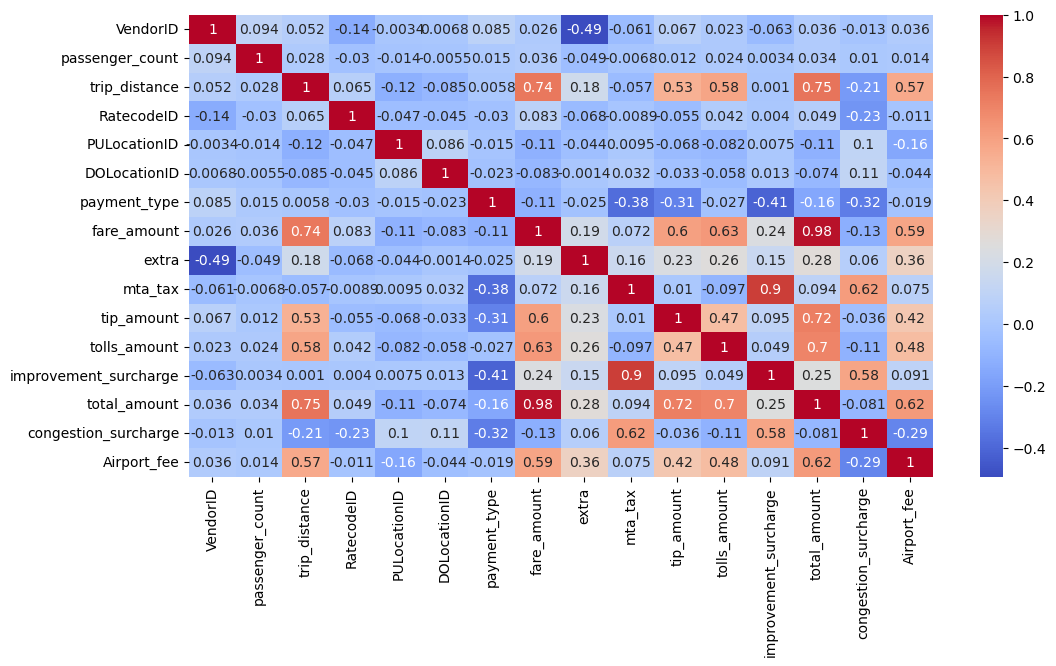

In [717]:

plt.figure(figsize=(12,6))

sns.heatmap(data1.corr(),annot = True , cmap = "coolwarm")

In [718]:
# taking total_amount as predicted variable 
# y=mx+c 
# y = total_amount

In [719]:
data1["total_amount"].info()

<class 'pandas.core.series.Series'>
Int64Index: 50000 entries, 718161 to 1712454
Series name: total_amount
Non-Null Count  Dtype  
--------------  -----  
50000 non-null  float64
dtypes: float64(1)
memory usage: 781.2 KB


In [720]:
data1.describe([0.01,0.02,0.03,0.05,0.10,0.25,0.30,0.50,0.65,0.75,0.90,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,10%,25%,...,50%,65%,75%,90%,95%,96%,97%,98%,99%,max
VendorID,50000.0,1.743700,0.438878,1.00,1.000,1.0,1.00,1.00,1.00,1.0,...,2.00,2.00,2.00,2.00,2.0000,2.0000,2.00,2.00,2.00,6.00
passenger_count,48159.0,1.358957,0.869748,0.00,0.000,1.0,1.00,1.00,1.00,1.0,...,1.00,1.00,1.00,2.00,3.0000,4.0000,4.00,5.00,5.00,8.00
trip_distance,50000.0,3.290171,4.964033,0.00,0.000,0.0,0.01,0.38,0.60,1.0,...,1.70,2.37,3.20,8.78,14.0805,16.6300,17.54,18.40,20.00,510.74
RatecodeID,48159.0,1.675139,7.651685,1.00,1.000,1.0,1.00,1.00,1.00,1.0,...,1.00,1.00,1.00,1.00,2.0000,2.0000,2.00,2.00,5.00,99.00
PULocationID,50000.0,165.749880,63.703369,1.00,24.000,43.0,43.00,48.00,74.00,132.0,...,162.00,186.00,234.00,239.00,249.0000,262.0000,262.00,263.00,263.00,265.00
DOLocationID,50000.0,164.692060,69.541640,1.00,10.000,17.0,36.00,43.00,68.00,114.0,...,162.00,229.00,234.00,242.00,261.0000,262.0000,263.00,263.00,264.00,265.00
payment_type,50000.0,1.170500,0.561138,0.00,0.000,0.0,0.00,1.00,1.00,1.0,...,1.00,1.00,1.00,2.00,2.0000,2.0000,2.00,3.00,4.00,4.00
fare_amount,50000.0,19.481487,18.521700,-136.70,-3.000,4.4,5.10,5.80,6.50,9.3,...,14.20,17.70,22.60,41.50,66.7000,70.0000,70.00,70.00,77.90,377.50
extra,50000.0,1.499558,1.845044,-7.50,0.000,0.0,0.00,0.00,0.00,0.0,...,1.00,2.50,2.50,3.50,5.0000,5.0000,5.00,6.00,7.50,11.75
mta_tax,50000.0,0.484070,0.114593,-0.50,-0.500,0.0,0.50,0.50,0.50,0.5,...,0.50,0.50,0.50,0.50,0.5000,0.5000,0.50,0.50,0.50,0.50


In [721]:
data1["total_amount"].nunique()

5033

In [722]:
# plt.figure(figsize=(12,6))
# data1["total_amount"].value_counts().plot(kind = "bar")

In [723]:
data1.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
718161,2,2023-11-07 13:58:12,2023-11-07 14:00:58,1.0,0.64,1.0,N,140,140,1,5.10,0.0,0.5,1.82,0.0,1.0,10.92,2.5,0.0
3248350,1,2023-11-09 19:03:53,2023-11-09 19:30:00,NaN,0.00,NaN,None,161,140,0,25.46,0.0,0.5,0.00,0.0,1.0,29.46,NaN,NaN


In [724]:
data1[["total_amount","VendorID"]].corr()

,total_amount,VendorID
total_amount,1.000000,0.035643
VendorID,0.035643,1.000000


In [725]:
data1[["total_amount","passenger_count"]].corr()

,total_amount,passenger_count
total_amount,1.000000,0.033827
passenger_count,0.033827,1.000000


In [726]:
data1[["total_amount","trip_distance"]].corr()

,total_amount,trip_distance
total_amount,1.000000,0.752021
trip_distance,0.752021,1.000000


In [727]:
data1[["total_amount","RatecodeID"]].corr()

,total_amount,RatecodeID
total_amount,1.000000,0.049017
RatecodeID,0.049017,1.000000


In [728]:
data1[["total_amount","PULocationID"]].corr()

,total_amount,PULocationID
total_amount,1.000000,-0.114023
PULocationID,-0.114023,1.000000


In [729]:
data1[["total_amount","DOLocationID"]].corr()

,total_amount,DOLocationID
total_amount,1.000000,-0.074441
DOLocationID,-0.074441,1.000000


In [730]:
# data1[["total_amount","payment_type"]].corr()

In [731]:
data1[["total_amount","fare_amount"]].corr()

,total_amount,fare_amount
total_amount,1.000000,0.980061
fare_amount,0.980061,1.000000


In [732]:
data1[["total_amount","extra"]].corr()

,total_amount,extra
total_amount,1.000000,0.275533
extra,0.275533,1.000000


In [733]:
data1[["total_amount","mta_tax"]].corr()

,total_amount,mta_tax
total_amount,1.000000,0.093924
mta_tax,0.093924,1.000000


In [734]:
data1[["total_amount","tip_amount"]].corr()

,total_amount,tip_amount
total_amount,1.000000,0.716578
tip_amount,0.716578,1.000000


In [735]:
data1[["total_amount","tolls_amount"]].corr()

,total_amount,tolls_amount
total_amount,1.000000,0.700947
tolls_amount,0.700947,1.000000


In [736]:
data1[["total_amount","improvement_surcharge"]].corr()

,total_amount,improvement_surcharge
total_amount,1.000000,0.252192
improvement_surcharge,0.252192,1.000000


In [737]:
data1[["total_amount","total_amount"]].corr()

,total_amount,total_amount
total_amount,1.0,1.0
total_amount,1.0,1.0


In [738]:
data1[["total_amount","congestion_surcharge"]].corr()

,total_amount,congestion_surcharge
total_amount,1.000000,-0.080739
congestion_surcharge,-0.080739,1.000000


In [739]:
data1[["total_amount","Airport_fee"]].corr()

,total_amount,Airport_fee
total_amount,1.000000,0.620939
Airport_fee,0.620939,1.000000


In [740]:
data1.groupby("store_and_fwd_flag").agg({"total_amount":["mean","median","count","max","min"]})

total_amount                               
                           mean  median  count     max     min
store_and_fwd_flag                                            
N                     28.482817  21.245  47930  403.98 -139.95
Y                     26.045459  20.900    229   99.19    7.00

In [741]:
# feature engineering 

In [742]:
data1.drop(["tip_amount"],inplace = True,axis=1)

In [743]:
from datetime import date 
# data1["total_days"] = data1["tpep_pickup_datetime"].dt.day - data1["tpep_dropoff_datetime"].dt.day
# data1.drop(["total_days"],axis=1,inplace = True)
# data1.drop(["total_extra_amount"],axis=1,inplace = True)

In [744]:
data1["total_extra_amount"] = data1["extra"] +data1["mta_tax"] +data1["tolls_amount"]+data1["improvement_surcharge"]+data1["congestion_surcharge"]+data1["Airport_fee"]

In [745]:
data1.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,total_extra_amount
718161,2,2023-11-07 13:58:12,2023-11-07 14:00:58,1.0,0.64,1.0,N,140,140,1,5.10,0.0,0.5,0.00,1.0,10.92,2.5,0.00,4.00
3248350,1,2023-11-09 19:03:53,2023-11-09 19:30:00,NaN,0.00,NaN,None,161,140,0,25.46,0.0,0.5,0.00,1.0,29.46,NaN,NaN,NaN
2980678,1,2023-11-29 06:56:14,2023-11-29 07:05:13,1.0,1.10,1.0,N,140,161,1,9.30,2.5,0.5,0.00,1.0,15.95,2.5,0.00,6.50
2131931,2,2023-11-19 15:37:50,2023-11-19 16:00:12,1.0,10.24,1.0,N,236,200,2,42.20,0.0,0.5,3.18,1.0,49.38,2.5,0.00,7.18
2185322,2,2023-11-20 08:33:50,2023-11-20 08:51:29,1.0,1.19,1.0,N,162,186,1,15.60,0.0,0.5,0.00,1.0,23.52,2.5,0.00,4.00
572214,2,2023-11-05 21:20:44,2023-11-05 21:30:38,2.0,2.41,1.0,N,234,237,1,13.50,1.0,0.5,0.00,1.0,22.20,2.5,0.00,5.00
226878,2,2023-11-02 21:06:55,2023-11-02 21:19:01,1.0,2.45,1.0,N,161,262,1,13.50,1.0,0.5,0.00,1.0,22.20,2.5,0.00,5.00
1475630,2,2023-11-13 23:48:38,2023-11-14 00:19:51,1.0,10.25,1.0,N,148,22,1,45.00,1.0,0.5,0.00,1.0,62.50,2.5,0.00,5.00
559354,2,2023-11-05 18:50:27,2023-11-05 19:48:22,5.0,19.12,1.0,N,132,33,2,78.60,0.0,0.5,0.00,1.0,81.85,0.0,1.75,3.25
1885537,2,2023-11-17 14:00:02,2023-11-17 14:14:24,1.0,1.15,1.0,N,163,237,1,13.50,0.0,0.5,0.00,1.0,21.00,2.5,0.00,4.00


In [746]:
data1.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          1841
trip_distance               0
RatecodeID               1841
store_and_fwd_flag       1841
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     1841
Airport_fee              1841
total_extra_amount       1841
dtype: int64

In [747]:
data1.drop(["store_and_fwd_flag"],axis=1,inplace = True)

In [748]:
data1.shape

(50000, 18)

In [749]:
data1["tpep_pickup_datetime"]

718161    2023-11-07 13:58:12
3248350   2023-11-09 19:03:53
2980678   2023-11-29 06:56:14
2131931   2023-11-19 15:37:50
2185322   2023-11-20 08:33:50
                  ...        
2436973   2023-11-22 17:26:58
2633490   2023-11-25 14:02:03
1294470   2023-11-12 06:35:34
732426    2023-11-07 15:33:43
1712454   2023-11-16 00:35:59
Name: tpep_pickup_datetime, Length: 50000, dtype: datetime64[ns]

In [750]:
from datetime import date
data1["tpep_pickup_day"] = data1["tpep_pickup_datetime"].dt.day

In [751]:
data1["tpep_pickup_year"] = data1["tpep_pickup_datetime"].dt.year

In [752]:
data1["tpep_pickup_month"] = data1["tpep_pickup_datetime"].dt.month

In [753]:
data1["tpep_dropoff_datetime"] = data1["tpep_dropoff_datetime"].dt.day

In [754]:
data1["tpep_dropoff_year"] = data1["tpep_pickup_datetime"].dt.year

In [755]:
data1["tpep_dropoff_month"] = data1["tpep_pickup_datetime"].dt.month 

In [756]:
data1.rename({"tpep_dropoff_datetime":"tpep_dropoff_day"},inplace = True,axis=1) 

In [757]:
data1.drop(["tpep_pickup_datetime"],inplace = True,axis=1)

In [758]:
# data1.head(2)

In [759]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 718161 to 1712454
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               50000 non-null  int32  
 1   tpep_dropoff_day       50000 non-null  int64  
 2   passenger_count        48159 non-null  float64
 3   trip_distance          50000 non-null  float64
 4   RatecodeID             48159 non-null  float64
 5   PULocationID           50000 non-null  int32  
 6   DOLocationID           50000 non-null  int32  
 7   payment_type           50000 non-null  int64  
 8   fare_amount            50000 non-null  float64
 9   extra                  50000 non-null  float64
 10  mta_tax                50000 non-null  float64
 11  tolls_amount           50000 non-null  float64
 12  improvement_surcharge  50000 non-null  float64
 13  total_amount           50000 non-null  float64
 14  congestion_surcharge   48159 non-null  float64


In [760]:
data1.isnull().sum()

VendorID                    0
tpep_dropoff_day            0
passenger_count          1841
trip_distance               0
RatecodeID               1841
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     1841
Airport_fee              1841
total_extra_amount       1841
tpep_pickup_day             0
tpep_pickup_year            0
tpep_pickup_month           0
tpep_dropoff_year           0
tpep_dropoff_month          0
dtype: int64

In [761]:
data1.columns

Index(['VendorID', 'tpep_dropoff_day', 'passenger_count', 'trip_distance',
       'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'Airport_fee', 'total_extra_amount', 'tpep_pickup_day',
       'tpep_pickup_year', 'tpep_pickup_month', 'tpep_dropoff_year',
       'tpep_dropoff_month'],
      dtype='object')

In [762]:
data1.fillna(data1.median(),inplace = True)

In [763]:
data1.isnull().sum()

VendorID                 0
tpep_dropoff_day         0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
total_extra_amount       0
tpep_pickup_day          0
tpep_pickup_year         0
tpep_pickup_month        0
tpep_dropoff_year        0
tpep_dropoff_month       0
dtype: int64

In [764]:
# outlier treatment 

In [765]:
data1.describe([0.01,0.02,0.03,0.05,0.10,0.25,0.50,0.75,0.80,0.90,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,10%,25%,50%,75%,80%,90%,95%,96%,97%,98%,99%,max
VendorID,50000.0,1.743700,0.438878,1.00,1.000,1.0,1.00,1.00,1.00,1.0,2.00,2.00,2.000,2.00,2.0000,2.0000,2.00,2.00,2.00,6.00
tpep_dropoff_day,50000.0,14.934560,8.682162,1.00,1.000,1.0,1.00,2.00,3.00,8.0,15.00,22.00,24.000,28.00,29.0000,29.0000,30.00,30.00,30.00,30.00
passenger_count,50000.0,1.345740,0.856258,0.00,0.000,1.0,1.00,1.00,1.00,1.0,1.00,1.00,2.000,2.00,3.0000,3.0000,4.00,4.00,5.00,8.00
trip_distance,50000.0,3.290171,4.964033,0.00,0.000,0.0,0.01,0.38,0.60,1.0,1.70,3.20,3.940,8.78,14.0805,16.6300,17.54,18.40,20.00,510.74
RatecodeID,50000.0,1.650280,7.510570,1.00,1.000,1.0,1.00,1.00,1.00,1.0,1.00,1.00,1.000,1.00,2.0000,2.0000,2.00,2.00,5.00,99.00
PULocationID,50000.0,165.749880,63.703369,1.00,24.000,43.0,43.00,48.00,74.00,132.0,162.00,234.00,236.000,239.00,249.0000,262.0000,262.00,263.00,263.00,265.00
DOLocationID,50000.0,164.692060,69.541640,1.00,10.000,17.0,36.00,43.00,68.00,114.0,162.00,234.00,236.000,242.00,261.0000,262.0000,263.00,263.00,264.00,265.00
payment_type,50000.0,1.170500,0.561138,0.00,0.000,0.0,0.00,1.00,1.00,1.0,1.00,1.00,1.000,2.00,2.0000,2.0000,2.00,3.00,4.00,4.00
fare_amount,50000.0,19.481487,18.521700,-136.70,-3.000,4.4,5.10,5.80,6.50,9.3,14.20,22.60,25.484,41.50,66.7000,70.0000,70.00,70.00,77.90,377.50
extra,50000.0,1.499558,1.845044,-7.50,0.000,0.0,0.00,0.00,0.00,0.0,1.00,2.50,2.500,3.50,5.0000,5.0000,5.00,6.00,7.50,11.75


In [766]:
def outliercap(x):
    x = x.clip(upper=x.quantile(0.9))
    return x

In [767]:
data2 = data1.apply(outliercap)

In [768]:
# data1

In [769]:
data2.describe([0.01,0.02,0.03,0.05,0.10,0.25,0.50,0.75,0.80,0.90,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,10%,25%,50%,75%,80%,90%,95%,96%,97%,98%,99%,max
VendorID,50000.0,1.743300,0.436817,1.00,1.000,1.0,1.00,1.00,1.00,1.0,2.00,2.00,2.000,2.00,2.00,2.00,2.00,2.00,2.00,2.00
tpep_dropoff_day,50000.0,14.824040,8.502560,1.00,1.000,1.0,1.00,2.00,3.00,8.0,15.00,22.00,24.000,28.00,28.00,28.00,28.00,28.00,28.00,28.00
passenger_count,50000.0,1.205480,0.432876,0.00,0.000,1.0,1.00,1.00,1.00,1.0,1.00,1.00,2.000,2.00,2.00,2.00,2.00,2.00,2.00,2.00
trip_distance,50000.0,2.688614,2.566102,0.00,0.000,0.0,0.01,0.38,0.60,1.0,1.70,3.20,3.940,8.78,8.78,8.78,8.78,8.78,8.78,8.78
RatecodeID,50000.0,1.000000,0.000000,1.00,1.000,1.0,1.00,1.00,1.00,1.0,1.00,1.00,1.000,1.00,1.00,1.00,1.00,1.00,1.00,1.00
PULocationID,50000.0,164.296180,61.756872,1.00,24.000,43.0,43.00,48.00,74.00,132.0,162.00,234.00,236.000,239.00,239.00,239.00,239.00,239.00,239.00,239.00
DOLocationID,50000.0,163.276720,67.743900,1.00,10.000,17.0,36.00,43.00,68.00,114.0,162.00,234.00,236.000,242.00,242.00,242.00,242.00,242.00,242.00,242.00
payment_type,50000.0,1.135240,0.436571,0.00,0.000,0.0,0.00,1.00,1.00,1.0,1.00,1.00,1.000,2.00,2.00,2.00,2.00,2.00,2.00,2.00
fare_amount,50000.0,17.252541,11.973930,-136.70,-3.000,4.4,5.10,5.80,6.50,9.3,14.20,22.60,25.484,41.50,41.50,41.50,41.50,41.50,41.50,41.50
extra,50000.0,1.288798,1.366055,-7.50,0.000,0.0,0.00,0.00,0.00,0.0,1.00,2.50,2.500,3.50,3.50,3.50,3.50,3.50,3.50,3.50


In [770]:
# checking multicolinearity

In [771]:
data2.head()

,VendorID,tpep_dropoff_day,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,total_extra_amount,tpep_pickup_day,tpep_pickup_year,tpep_pickup_month,tpep_dropoff_year,tpep_dropoff_month
718161,2,7,1.0,0.64,1.0,140,140,1,5.10,0.0,...,1.0,10.92,2.5,0.0,4.00,7,2023,11,2023,11
3248350,1,9,1.0,0.00,1.0,161,140,0,25.46,0.0,...,1.0,29.46,2.5,0.0,5.00,9,2023,11,2023,11
2980678,1,28,1.0,1.10,1.0,140,161,1,9.30,2.5,...,1.0,15.95,2.5,0.0,6.50,28,2023,11,2023,11
2131931,2,19,1.0,8.78,1.0,236,200,2,41.50,0.0,...,1.0,49.38,2.5,0.0,7.18,19,2023,11,2023,11
2185322,2,20,1.0,1.19,1.0,162,186,1,15.60,0.0,...,1.0,23.52,2.5,0.0,4.00,20,2023,11,2023,11


In [772]:
# data1.columns

In [773]:
data2 = data1[['VendorID', 'tpep_dropoff_day', 'passenger_count', 'trip_distance',
       'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'Airport_fee']].corr()

In [774]:
# data2

In [775]:
# cor = data1.corr()

[]

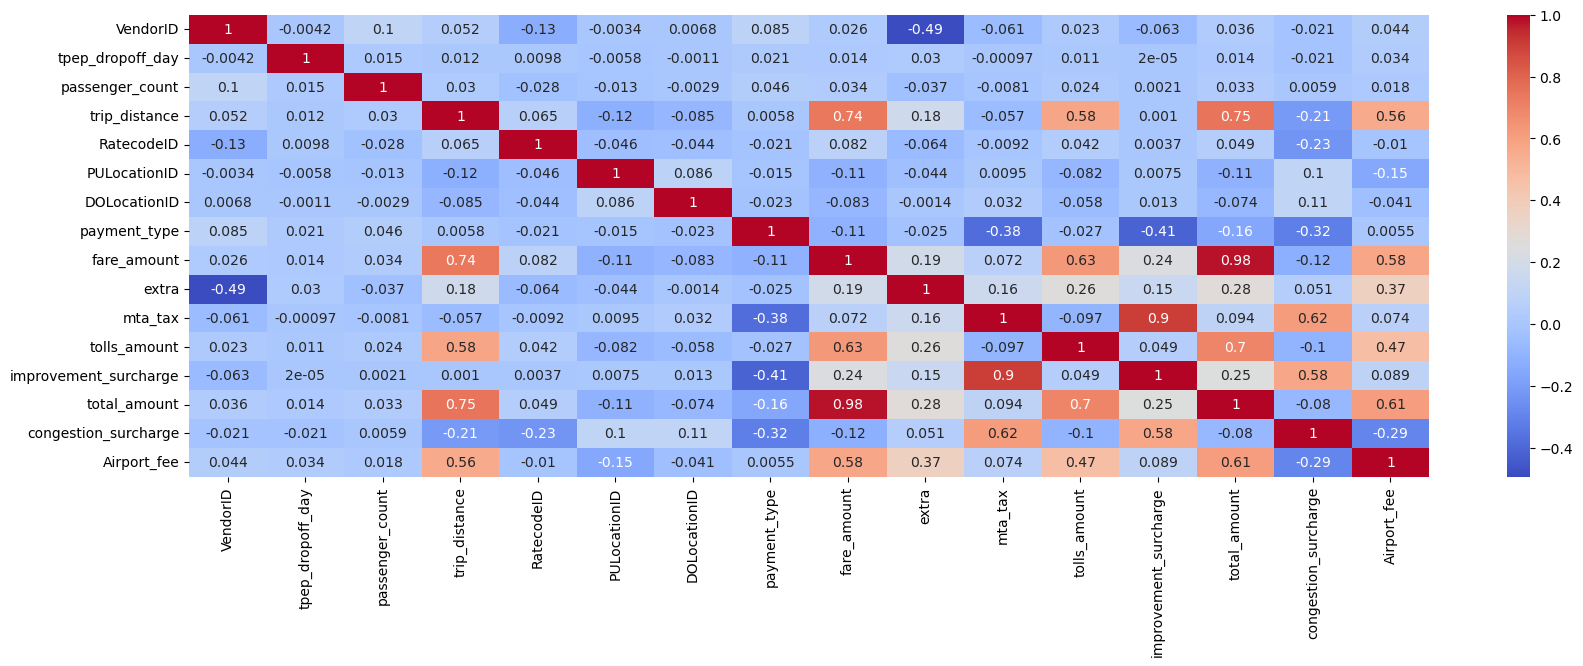

In [776]:
plt.figure(figsize=(20,6))
sns.heatmap(data2,annot=True,cmap="coolwarm")
plt.plot()

In [777]:
from scipy import stats 

In [778]:
stats.jarque_bera(data1["total_amount"])

SignificanceResult(statistic=447855.080548193, pvalue=0.0)

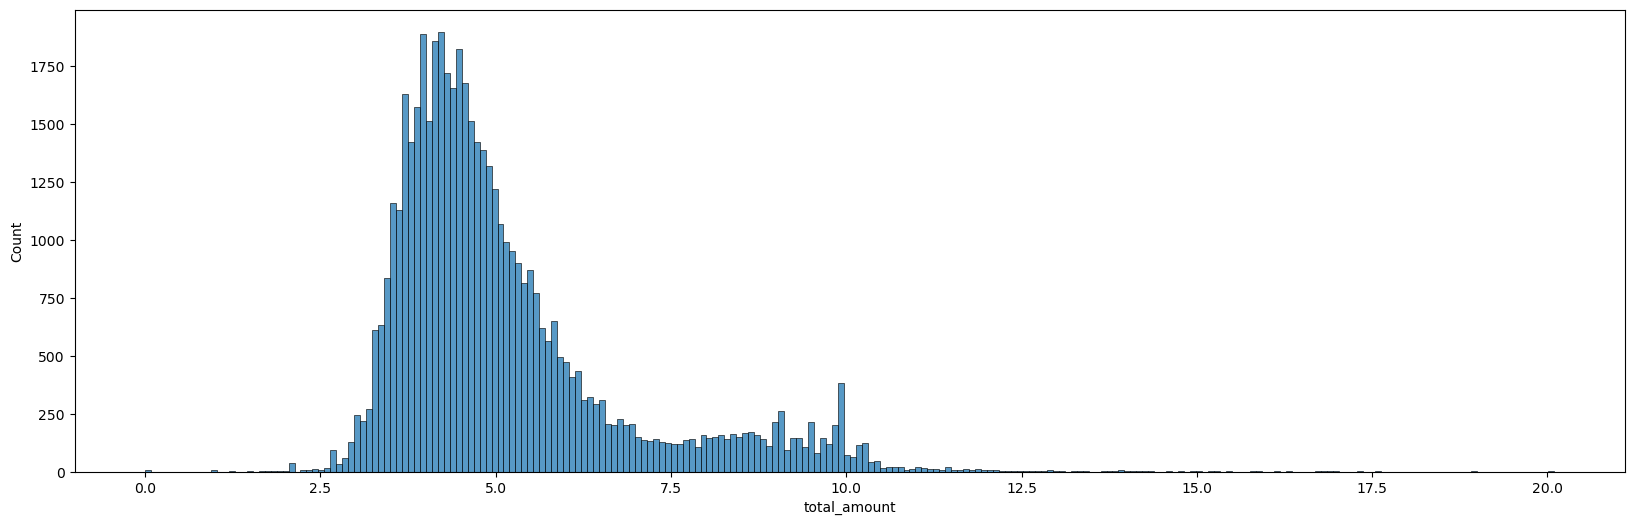

In [779]:
data1["total_amount"] = (data1["total_amount"])**(1/2)
plt.figure(figsize=(20,6))
sns.histplot(data1["total_amount"])
plt.show()

In [780]:
stats.jarque_bera(data1["total_amount"])

SignificanceResult(statistic=nan, pvalue=nan)

In [781]:
data1.columns

Index(['VendorID', 'tpep_dropoff_day', 'passenger_count', 'trip_distance',
       'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'Airport_fee', 'total_extra_amount', 'tpep_pickup_day',
       'tpep_pickup_year', 'tpep_pickup_month', 'tpep_dropoff_year',
       'tpep_dropoff_month'],
      dtype='object')

### model development 

In [790]:
y=data1["total_amount"]
x=data1[['VendorID', 'tpep_dropoff_day', 'passenger_count', 'trip_distance',
       'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tolls_amount',
       'improvement_surcharge', 'congestion_surcharge',
       'Airport_fee', 'total_extra_amount', 'tpep_pickup_day',
       'tpep_pickup_year', 'tpep_pickup_month', 'tpep_dropoff_year',
       'tpep_dropoff_month']]

In [791]:
from sklearn.model_selection import train_test_split

In [792]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3 , random_state=88)

In [793]:
x_train.shape

(35000, 21)

In [794]:
x_train.head(2)

,VendorID,tpep_dropoff_day,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,total_extra_amount,tpep_pickup_day,tpep_pickup_year,tpep_pickup_month,tpep_dropoff_year,tpep_dropoff_month
2807680,2,27,1.0,2.67,1.0,138,223,2,18.4,5.0,...,0.0,1.0,0.0,1.75,8.25,27,2023,11,2023,11
471304,2,4,3.0,1.05,1.0,233,237,2,-7.2,-1.0,...,0.0,-1.0,-2.5,0.00,-5.00,4,2023,11,2023,11


In [796]:
# data1.isnull().sum()

In [788]:
# data1.fillna(data1["total_amount"].median(),inplace = True)

In [795]:
# data1.isnull().sum()

In [798]:
import statsmodels.api as sm 
x_train1 = x_train[['VendorID', 'tpep_dropoff_day', 'passenger_count', 'trip_distance',
       'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tolls_amount',
       'improvement_surcharge', 'congestion_surcharge',
       'Airport_fee', 'total_extra_amount', 'tpep_pickup_day',
       'tpep_pickup_year', 'tpep_pickup_month', 'tpep_dropoff_year',
       'tpep_dropoff_month']]
x_train1 = sm.add_constant(x_train1)
models=sm.OLS(y_train,x_train1)
results = models.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:           total_amount   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 3.100e+04
Date:                Sun, 11 Feb 2024   Prob (F-statistic):               0.00
Time:                        11:01:00   Log-Likelihood:                -19373.
No. Observations:               35000   AIC:                         3.878e+04
Df Residuals:                   34982   BIC:                         3.893e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
VendorID                  0.35

In [800]:
import statsmodels.api as sm 
x_train1 = x_train[['VendorID', 'passenger_count', 'trip_distance',
       'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tolls_amount',
       'improvement_surcharge', 'congestion_surcharge',
       'Airport_fee', 'total_extra_amount',
       ]]
x_train1 = sm.add_constant(x_train1)
models=sm.OLS(y_train,x_train1)
results = models.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           total_amount   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 3.514e+04
Date:                Sun, 11 Feb 2024   Prob (F-statistic):               0.00
Time:                        11:04:52   Log-Likelihood:                -19374.
No. Observations:               35000   AIC:                         3.878e+04
Df Residuals:                   34984   BIC:                         3.892e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.73

In [801]:
from sklearn.linear_model import LinearRegression 

In [802]:
line = LinearRegression()

In [804]:
line.fit(x_train,y_train)

LinearRegression()

In [805]:
line.coef_

array([ 3.55898820e-01, -8.17567209e-04,  9.26304903e-03,  6.77051853e-02,
        2.02812129e-03, -1.96280878e-04, -3.07758060e-04, -3.07155802e-01,
        7.01555149e-02,  1.70741073e-01,  6.58528481e-01,  5.35138991e-02,
       -2.19051896e+00,  1.30252778e-01,  2.72631795e-02, -2.74959803e-02,
        4.12912379e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00])

In [806]:
line.intercept_

4.737688423767933

### Model Evaluation

In [807]:
pred_train = line.predict(x_train)

In [818]:
pred_test = line.predict(x_test)
pred_test

array([4.83932358, 4.26933796, 8.17314283, ..., 4.52493571, 4.42798107,
       4.67769687])

In [808]:
pred_train

array([5.02477683, 5.81303335, 4.3741504 , ..., 4.20005513, 4.7516104 ,
       4.63999615])

In [811]:
or_train = np.sqrt(y_train)
pr_train = np.sqrt(pred_train)

C:\Users\Hp\AppData\Local\Temp\ipykernel_24280\2715838094.py:2: RuntimeWarning: invalid value encountered in sqrt
  pr_train = np.sqrt(pred_train)


In [812]:
pd.DataFrame({"Actual_value" : or_train , "pred_value": pr_train})

,Actual_value,pred_value
2807680,2.272084,2.241601
471304,2.152072,2.411023
2858932,2.083388,2.091447
1208596,1.781825,1.941156
649147,2.269308,2.260035
...,...,...
1970986,1.990558,2.104873
2168614,1.876530,1.979255
1322889,2.045312,2.049404
152681,2.140695,2.179819


In [814]:
# x_train.head(2)

<Axes: >

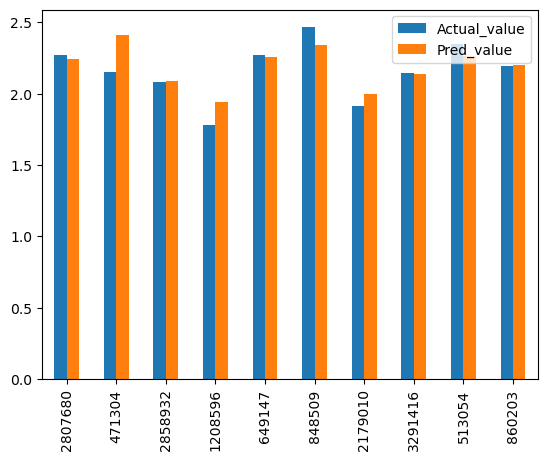

In [816]:
pd.DataFrame({"Actual_value":or_train , "Pred_value" : pr_train}).head(10).plot(kind="bar")

In [819]:
#MSE = np.mean(( Pred - actual)**2)
MSE_train = np.mean(pred_train - x_train)**(2)
MSE_test = np.mean(pred_test - x_test)**(2)
print(f"MSE_train {MSE_train}\n MSE_test {MSE_test}")

ValueError: Unable to coerce to Series, length must be 21: given 35000